In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

ModuleNotFoundError: No module named 'keras'

In [2]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/kaggle/input/pothole-detection-dataset/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

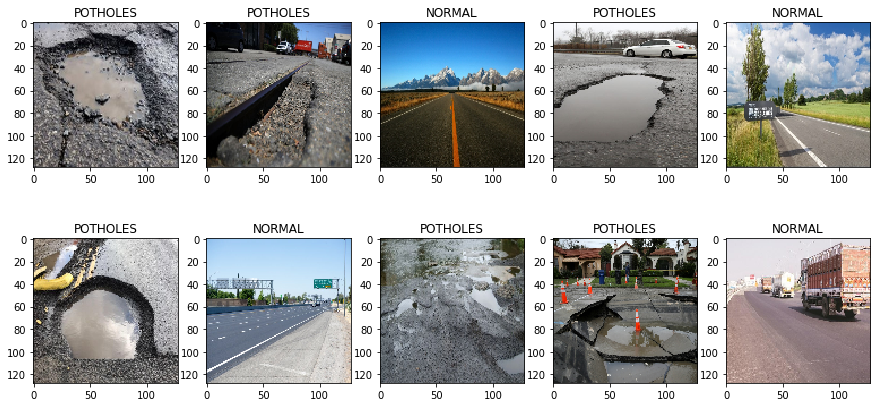

In [4]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [7]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [9]:
model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Train on 510 samples, validate on 170 samples
Epoch 1/30
 - 4s - loss: 3.4113 - accuracy: 0.5431 - val_loss: 0.6609 - val_accuracy: 0.5765
Epoch 2/30
 - 1s - loss: 0.6125 - accuracy: 0.6549 - val_loss: 0.3734 - val_accuracy: 0.9000
Epoch 3/30
 - 1s - loss: 0.4665 - accuracy: 0.7784 - val_loss: 0.4184 - val_accuracy: 0.8059
Epoch 4/30
 - 0s - loss: 0.4652 - accuracy: 0.7980 - val_loss: 0.4811 - val_accuracy: 0.7471
Epoch 5/30
 - 0s - loss: 0.5505 - accuracy: 0.7294 - val_loss: 0.5553 - val_accuracy: 0.5529
Epoch 6/30
 - 0s - loss: 0.5050 - accuracy: 0.7588 - val_loss: 0.3761 - val_accuracy: 0.8294
Epoch 7/30
 - 0s - loss: 0.4072 - accuracy: 0.8216 - val_loss: 0.2525 - val_accuracy: 0.8765
Epoch 8/30
 - 0s - loss: 0.3663 - accuracy: 0.8510 - val_loss: 0.3846 - val_accuracy: 0.8706
Epoch 9/30
 - 0s - loss: 0.3607 - accuracy: 0.8353 - val_loss: 0.4348 - val_accuracy: 0.8941
Epoch 10/30
 - 0s - loss: 0.3156 - accuracy: 0.8804 - val_loss: 0.2406 - val_accuracy: 0.9235
Epoch 11/30
 - 0s - los

In [10]:

loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

170/170 [==============================] - 0s 695us/step
Test accuracy: 84.71%


In [11]:
# Making predictions on test data
prediction = model.predict(x_test)

In [12]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [13]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        

In [14]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,76,6
Actual POTHOLES,20,68


# **VGG16 Transfer Learning**

In [15]:
IMG_SIZE=128

# training config:
epochs = 5
batch_size = 32

X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('/kaggle/input/pothole-detection-dataset/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

In [16]:
IMG_SIZE=128

# training config:
epochs = 5
batch_size = 32

filename=[]
y=[]
for image in imagepaths:
    try:
        #filename.append(image[image.rfind('/')+1:])
        filename.append(image)
        if(image.startswith('/kaggle/input/pothole-detection-dataset/normal/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

In [17]:
img_df = pd.DataFrame(
    {'filename': filename,
     'y': y
    })

img_df=img_df.sample(frac=1)

In [18]:
tr_img=img_df[:450]
valid_img=img_df[450:]

In [19]:
IMAGE_SIZE = [128, 128]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [20]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [21]:
folders = glob('/kaggle/input/pothole-detection-dataset' + '/*')

In [22]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [23]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [24]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy'])

In [26]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [27]:
test_gen = gen.flow_from_dataframe(
        dataframe=img_df,
        #directory='/kaggle/input/pothole-detection-dataset',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 681 validated image filenames belonging to 2 classes.
{'NORMAL': 0, 'POTHOLES': 1}


In [28]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

min: -122.41946 max: 114.45832


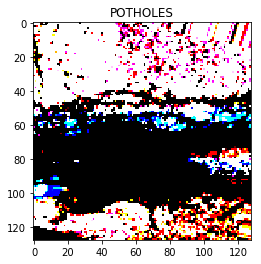

In [29]:
try:
    for x, y in test_gen:
      print("min:", x[0].min(), "max:", x[0].max())
      plt.title(labels[np.argmax(y[0])])
      plt.imshow(x[0])
      plt.show()
      break
except:
    pass

In [30]:
train_path = '/kaggle/input/pothole-detection-dataset'
# create generators
train_generator = gen.flow_from_dataframe(
        dataframe=tr_img,
        #directory='/kaggle/input/pothole-detection-dataset',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batch_size)

valid_generator = gen.flow_from_dataframe(
        dataframe=valid_img,
        #directory='/kaggle/input/pothole-detection-dataset',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batch_size)

Found 450 validated image filenames belonging to 2 classes.
Found 231 validated image filenames belonging to 2 classes.


In [31]:
train_img_path = '/kaggle/input/pothole-detection-dataset' + '/*/*.j*'
# fit the model
try:
    r = model.fit_generator(
          train_generator,
          validation_data=valid_generator,
          epochs=epochs,
          steps_per_epoch=len(image_files) // batch_size,
          validation_steps=len(valid_image_files) // batch_size)
except:
    pass